Generate Test Cases in Python

For ProblemS1 (monotonically decreasing), we'll generate random heights that decrease and corresponding random widths.

For ProblemS2 (unimodal with a single local minimum), we'll generate heights that first decrease and then increase with a single valley, and corresponding widths.

In [ ]:
import sys
import os

# Check the current working directory (useful for debugging)
print(f"Current Working Directory: {os.getcwd()}")

# Adjust the path to the 'python' folder inside the project structure
python_folder_path = os.path.abspath("../python") 

# Add the folder to sys.path if not already present
if python_folder_path not in sys.path:
    sys.path.insert(0, python_folder_path)  # Use insert(0) for priority

# Try importing the modules
try:
    from program1 import program1  # Importing program1
    from program2 import program2  # Importing program2
    print("Modules imported successfully.")
except ModuleNotFoundError as e:
    print(f"Error: {e}. Check if the files exist and the path is correct.")


Times for Program1 (monotonically decreasing): [0.000988006591796875, 0.0009818077087402344, 0.0020232200622558594, 0.002009868621826172, 0.0035779476165771484, 0.0060482025146484375, 0.02915024757385254]
Times for Program2 (unimodal): [0.0010957717895507812, 0.0009996891021728516, 0.0020020008087158203, 0.0015659332275390625, 0.0025069713592529297, 0.004996061325073242, 0.028414011001586914]


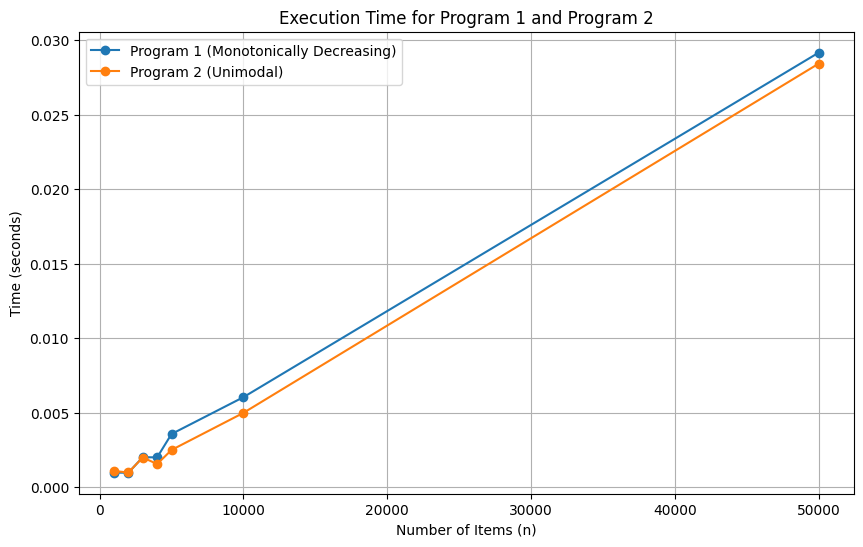

In [52]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Tuple

# Function to generate monotonically decreasing heights and random widths
def generate_monotonic_decreasing(n: int, max_height: int, max_width: int) -> Tuple[List[int], List[int]]:
    """
    Generates a monotonically decreasing sequence of heights and corresponding widths.

    Parameters:
    n (int): Number of sculptures
    max_height (int): Maximum possible height
    max_width (int): Maximum possible width

    Returns:
    Tuple[List[int], List[int]]: A list of decreasing heights and corresponding widths.
    """
    # Generate heights with duplicates allowed
    heights = sorted([random.randint(1, max_height) for _ in range(n)], reverse=True)
    
    # Generate widths randomly between 1 and max_width
    widths = [random.randint(1, max_width) for _ in range(n)]
    
    return heights, widths


# Function to generate unimodal heights and random widths
def generate_unimodal(n: int, max_height: int, max_width: int) -> Tuple[List[int], List[int]]:
    """
    Generates a unimodal sequence of heights and corresponding widths.

    Parameters:
    n (int): Number of sculptures
    max_height (int): Maximum possible height
    max_width (int): Maximum possible width

    Returns:
    Tuple[List[int], List[int]]: A unimodal list of heights and a list of corresponding widths.
    """
    # Determine the peak index
    peak_index = random.randint(1, n - 2)  # making sure there are values before and after the peak

    # Generate two parts: decreasing part before the peak, and increasing part after the peak
    decreasing_part = sorted([random.randint(1, max_height) for _ in range(peak_index)], reverse=True)
    increasing_part = sorted([random.randint(1, max_height) for _ in range(n - peak_index)])

    heights = decreasing_part + increasing_part  # Concatenate both parts to get a unimodal sequence
    
    # Generate widths randomly between 1 and max_width
    widths = [random.randint(1, max_width) for _ in range(n)]
    
    return heights, widths


# Timing function to test Program1 (monotonically decreasing)
def time_algorithm_prog1(n, W, heights, widths):
    start_time = time.time()
    # Calling algorithm program1(n, W, heights, widths)
    program1(n, W, heights, widths)
    end_time = time.time()
    return end_time - start_time

# Timing function to test Program2 (unimodal)
def time_algorithm_prog2(n, W, heights, widths):
    start_time = time.time()
    # Calling program2(n, W, heights, widths)
    program2(n, W, heights, widths)
    end_time = time.time()
    return end_time - start_time

# Number of items to test
test_sizes = [1000, 2000, 3000, 4000, 5000, 10000, 50000]

# Max height and width for the sculptures
max_height = 10000
max_width = 10
platform_width = 10

# Initialize lists to store timing results
times_prog1 = []
times_prog2 = []

for size in test_sizes:
    # Generate test case for ProblemS1 (monotonically decreasing)
    heights1, widths1 = generate_monotonic_decreasing(size, max_height, max_width)
    
    # Time the algorithm for ProblemS1
    time1 = time_algorithm_prog1(size, platform_width, heights1, widths1)
    times_prog1.append(time1)
    
    # Generate test case for ProblemS2 (unimodal)
    heights2, widths2 = generate_unimodal(size, max_height, max_width)
    
    # Time the algorithm for ProblemS2
    time2 = time_algorithm_prog2(size, platform_width, heights2, widths2)
    times_prog2.append(time2)

# Display timing results
print("Times for Program1 (monotonically decreasing):", times_prog1)
print("Times for Program2 (unimodal):", times_prog2)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(test_sizes, times_prog1, label='Program 1 (Monotonically Decreasing)', marker='o')
plt.plot(test_sizes, times_prog2, label='Program 2 (Unimodal)', marker='o')
plt.xlabel('Number of Items (n)')
plt.ylabel('Time (seconds)')
plt.title('Execution Time for Program 1 and Program 2')
plt.legend()
plt.grid(True)
plt.show()
